![MLU Logo](../../data/MLU_Logo.png)

## Pre-pruning with Sklearn Trees

In this exercise, we will go over some simple pre-pruning methods. These methods will control (limit) the grow of the tree.
1. Max depth
2. Max number of leaf nodes
3. Minimum impurity decrease

Let's create a random dataset below.

In [3]:
pip install matplotlib

    100% |████████████████████████████████| 8.5MB 2.5MB/s 
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 2.2MB 3.6MB/s 
    100% |████████████████████████████████| 16.0MB 2.4MB/s 
    100% |████████████████████████████████| 61kB 12.1MB/s 
    100% |████████████████████████████████| 71kB 16.6MB/s 
  The scripts f2py, f2py3 and f2py3.7 are installed in '/Library/Frameworks/Python.framework/Versions/3.7/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You are using pip version 18.1, however version 21.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


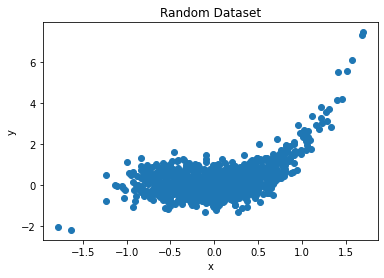

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1701)

x = np.random.randn(1000)/2
y = x**2+x**3 + 0.5*np.random.randn(1000)

plt.scatter(x, y)
plt.title("Random Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [8]:
### __1. Max depth:__
#The tree grows until we reach the max depth limit. Below, we will fit a decision tree with max depth ranging from 1 to 6.

In [10]:
pip install sklearn

    100% |████████████████████████████████| 7.2MB 6.1MB/s 
    100% |████████████████████████████████| 307kB 22.5MB/s 
    100% |████████████████████████████████| 30.7MB 1.2MB/s 
You are using pip version 18.1, however version 21.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


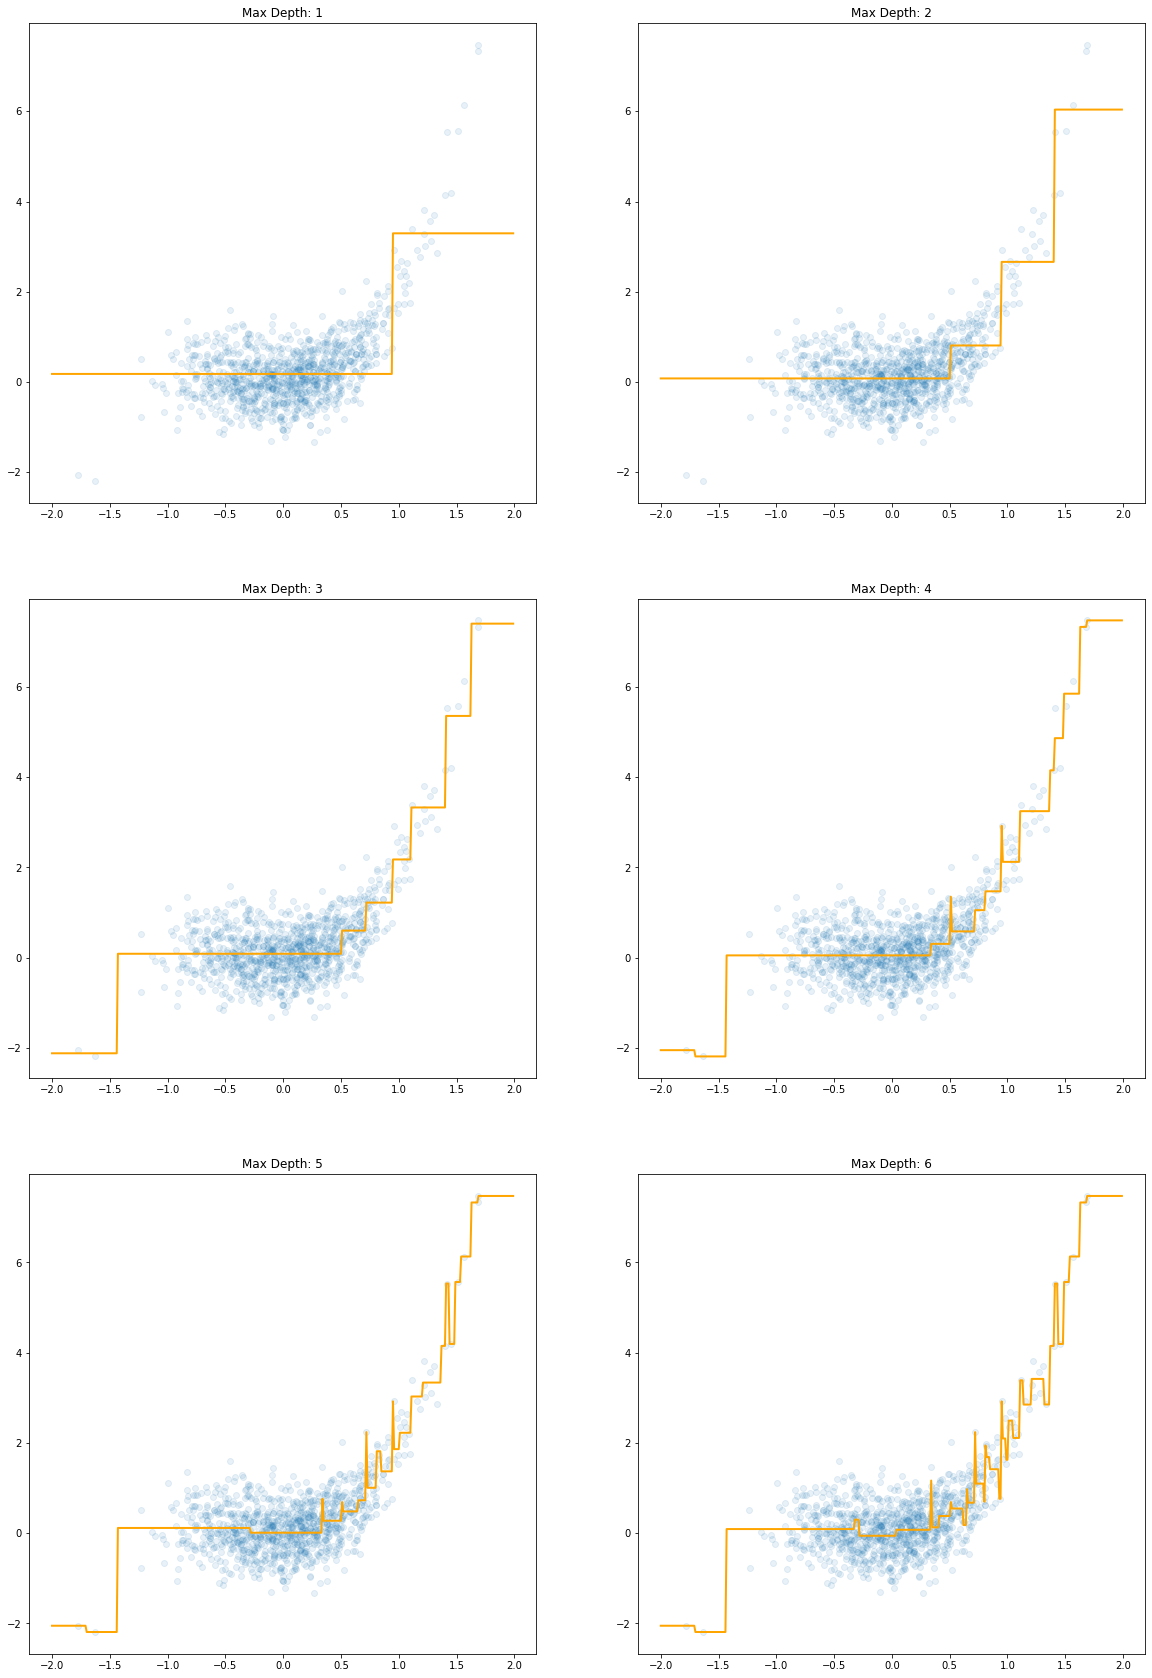

In [11]:
from sklearn.tree import DecisionTreeRegressor

xp = np.arange(-2.0, 2.0, 0.01).reshape(-1, 1)

def plot_depth(d = 1):
    model = DecisionTreeRegressor(max_depth = d)
    model.fit(np.array(x).reshape(-1,1), y)
    yp = model.predict(xp)
    
    # Plot the results
    plt.scatter(x, y, alpha=0.1)
    plt.plot(xp, yp, linewidth=2, color='orange')
    
plt.figure(figsize = (20, 30))
for i in range(6):
    plt.subplot(3, 2, i+1)
    plot_depth(i+1)
    plt.title("Max Depth: {}".format(i+1))
plt.show()

### __2. Max number of leaf nodes:__
The tree grows until we reach the max leaf limit. We will fit a decision tree with different number of max leaves.

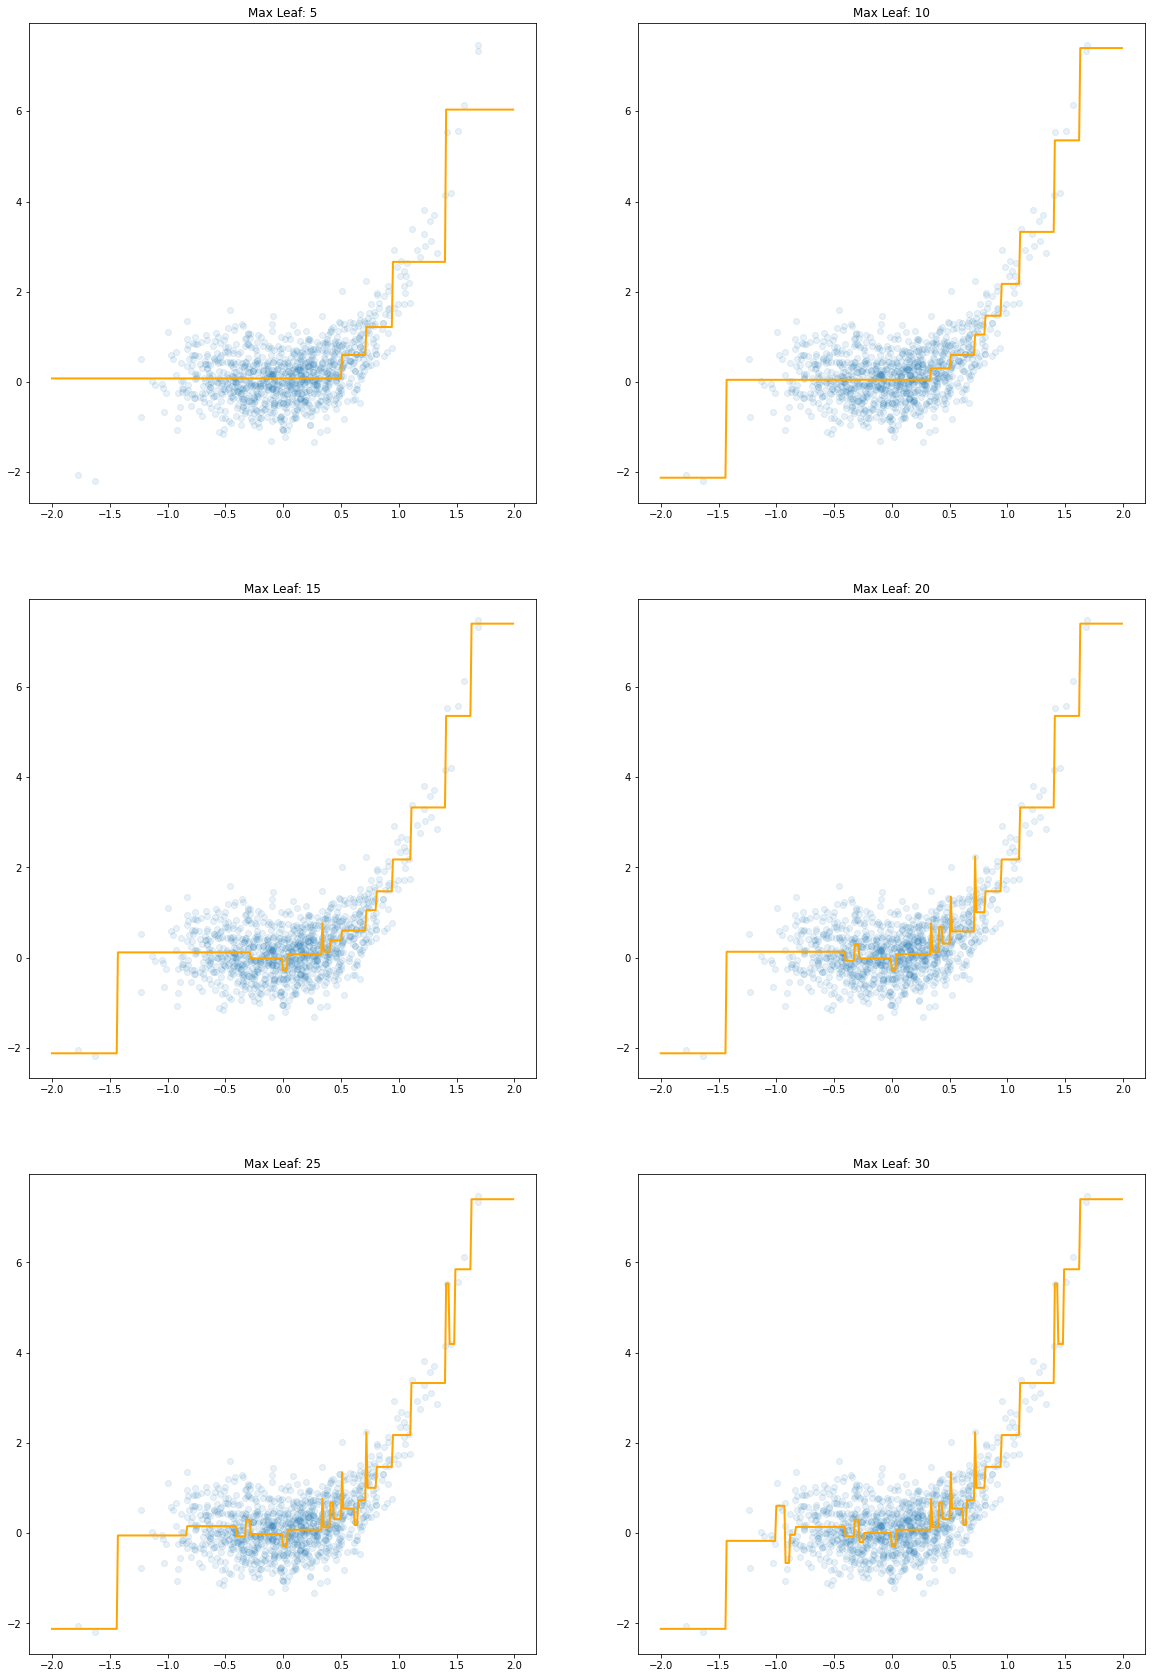

In [12]:
def plot_leaf(d = 2):
    model = DecisionTreeRegressor(max_leaf_nodes = d)
    model.fit(np.array(x).reshape(-1,1), y)
    yp = model.predict(xp)
        
    # Plot the results
    plt.scatter(x, y, alpha=0.1)
    plt.plot(xp, yp, linewidth=2, color='orange')
    
plt.figure(figsize = (20, 30))
for i in range(6):
    plt.subplot(3, 2, i+1)
    plot_leaf(5*(i+1))
    plt.title("Max Leaf: {}".format(5*(i+1)))
plt.show()

### __3. Min impurity decrease:__
The tree grows if a node induces a decrease of the impurity greater than or equal to this value. Details are [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html). Sklearn calculates a weighted minimum impurity decrease with this equation:

`N_t / N * (impurity - N_t_R / N_t * right_impurity- N_t_L / N_t * left_impurity)`

where `N` is the total number of samples, `N_t` is the number of samples at the current node, `N_t_L` is the number of samples in the left child, and `N_t_R` is the number of samples in the right child. 

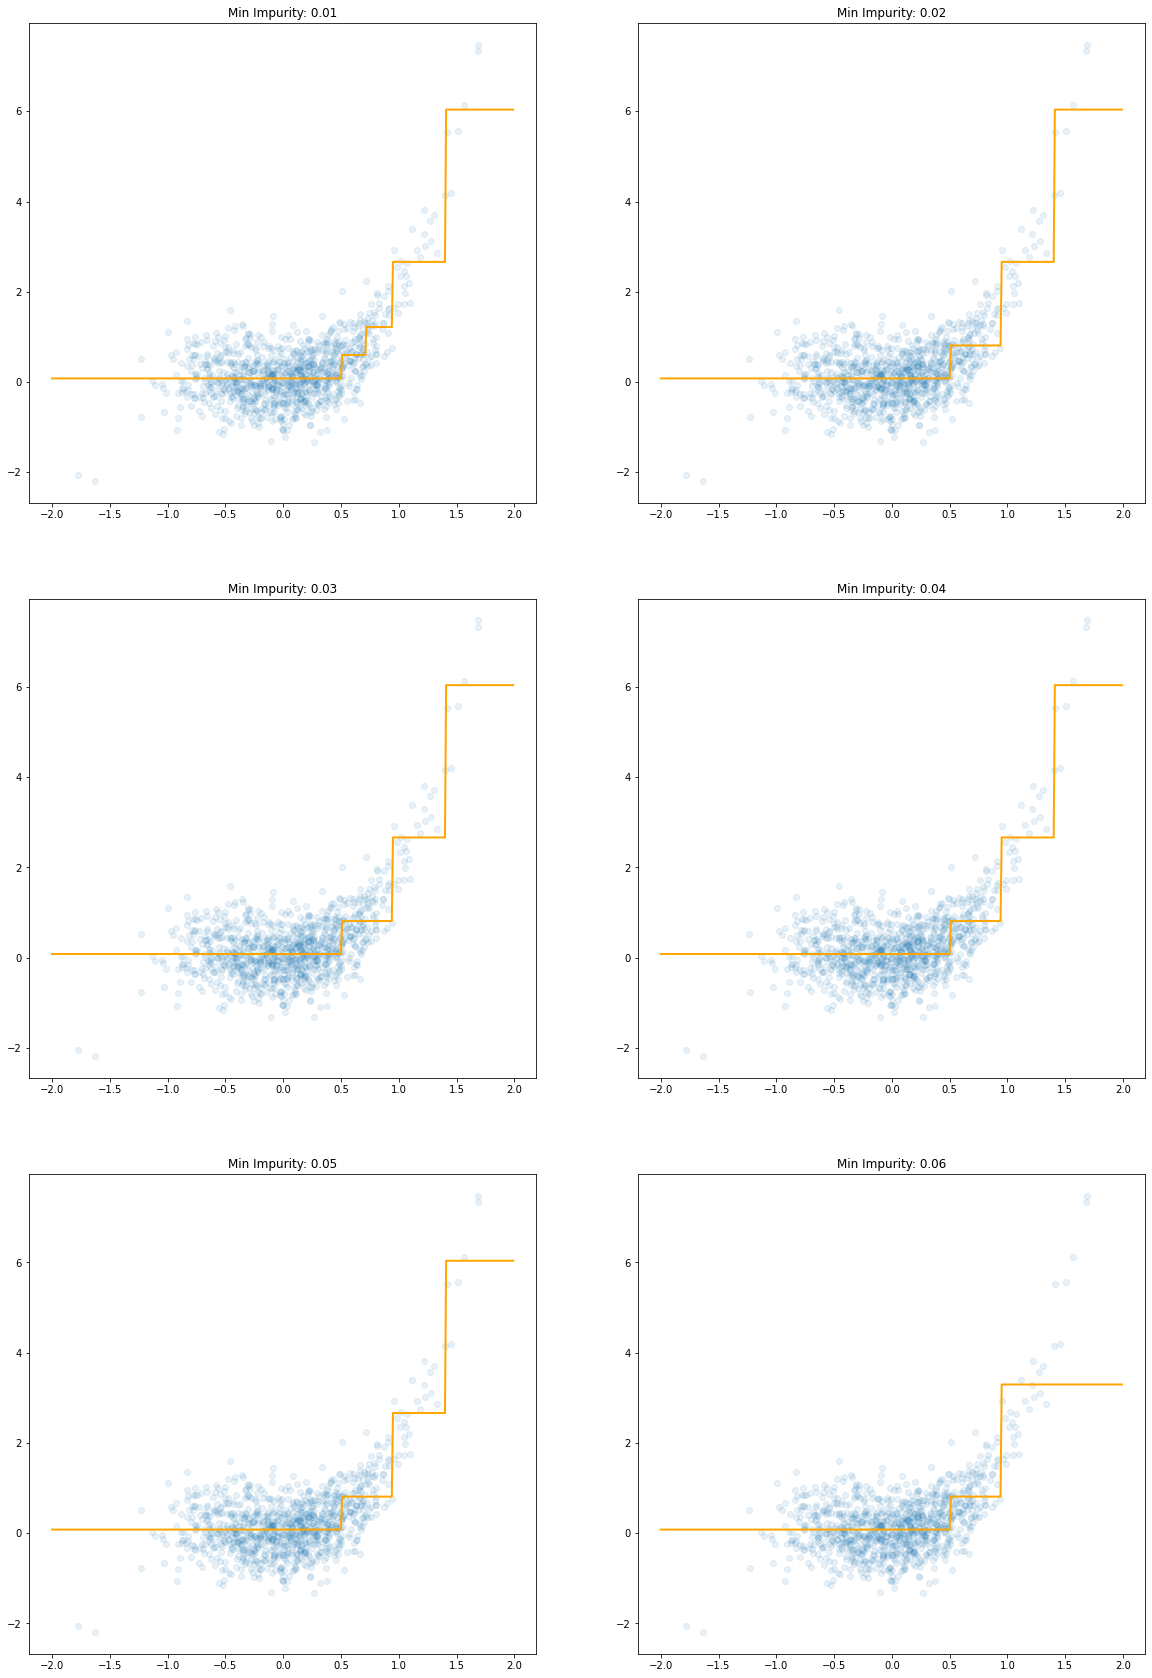

In [14]:
def plot_imp(d = 0.0) :
    model = DecisionTreeRegressor(min_impurity_decrease = d)
    model.fit(np.array(x).reshape(-1,1), y)
    yp = model.predict(xp)
    
    # Plot the results
    plt.scatter(x, y, alpha=0.1)
    plt.plot(xp, yp, linewidth=2, color='orange')
    
plt.figure(figsize = (20, 30))
for i in range(6):
    plt.subplot(3, 2, i+1)
    plot_imp(((i+1)/100.0))
    plt.title("Min Impurity: {}".format(((i+1)/100.0)))
plt.show()